In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
ti_train = pd.read_csv('titanic_train.csv')
ti_train
fare = ti_train['Fare']

<Axes: >

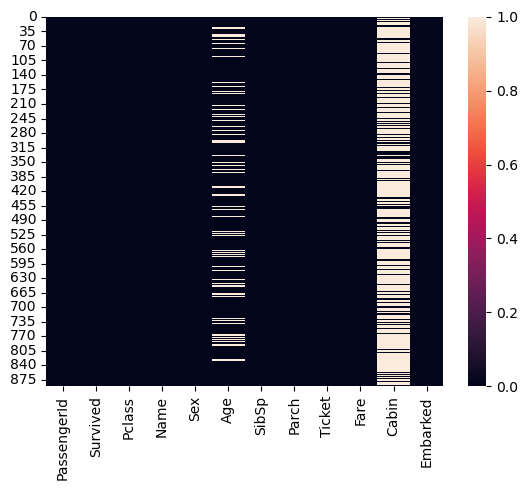

In [3]:
sns.heatmap(ti_train.isnull())

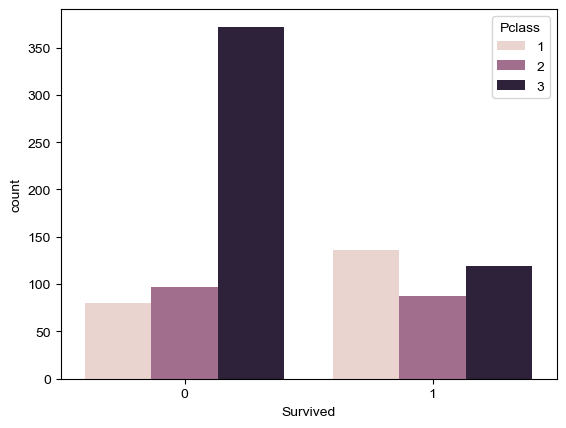

In [4]:
sns.countplot(data=ti_train, x = 'Survived', hue = 'Pclass')
sns.set_style('whitegrid')

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_3797/2079985319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti_train['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

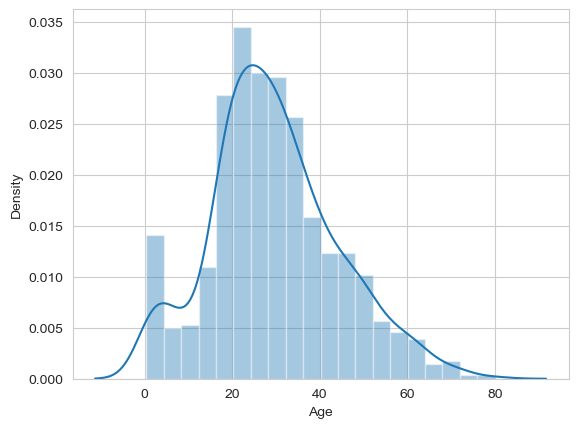

In [5]:
sns.distplot(ti_train['Age'].dropna())

<Axes: xlabel='SibSp', ylabel='count'>

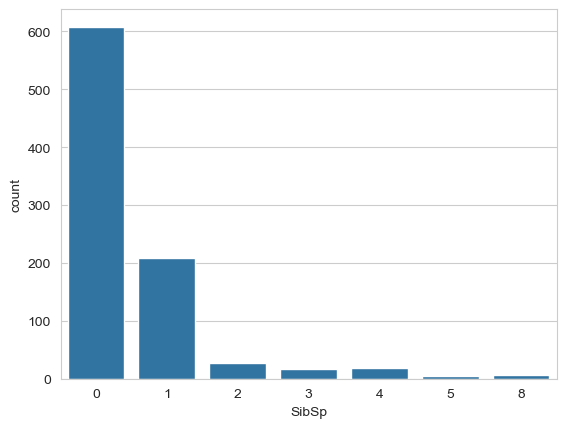

In [6]:
sns.countplot(data=ti_train, x = 'SibSp')


/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_3797/4118237360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

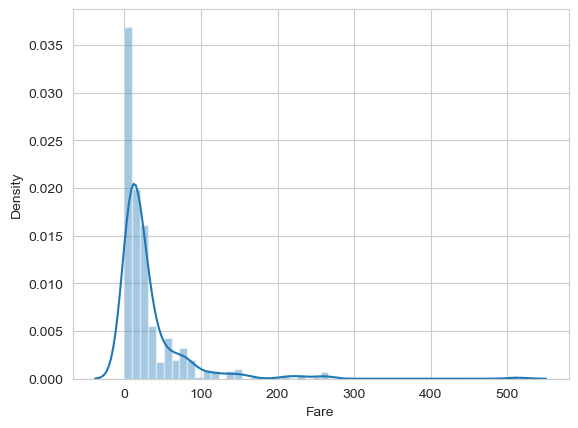

In [7]:
sns.distplot(ti_train['Fare'])

In [8]:
ti_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
ti_train3 = ti_train[ti_train['Pclass'] == 3]
ti_train3['Age'].mean()

25.14061971830986

In [10]:
ti_train3['Age'].isnull().sum()

136

In [11]:
ti_train2 = ti_train[ti_train['Pclass'] == 2]
ti_train2['Age'].mean()

29.87763005780347

In [12]:
ti_train1= ti_train[ti_train['Pclass'] == 1]
ti_train1['Age'].mean()

38.233440860215055

<Axes: >

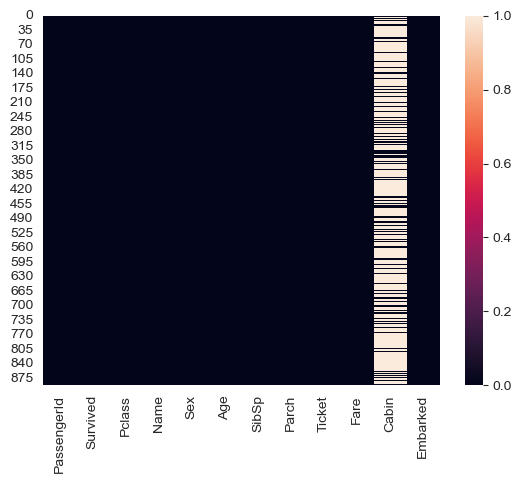

In [13]:
def impute_age(cols):
    pclass = cols['Pclass']
    if [(pclass == 3) & (cols['Age'] == 'NaN')]:
        cols['Age'] = cols['Age'].fillna(25.14)
    if [(pclass == 2) & (cols['Age'] == 'NaN')]:
        cols['Age'] = cols['Age'].fillna(29.88)
    if [(pclass == 1) & (cols['Age'] == 'NaN')]:
        cols['Age'] = cols['Age'].fillna(38.23)
    return cols
ti_train = impute_age(ti_train)

sns.heatmap(ti_train.isnull())
# no null values in age:

In [14]:
del ti_train['Cabin']
ti_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C


In [15]:
ti_train = ti_train.dropna()

In [16]:
# creating dummy variable:
sex = pd.get_dummies(ti_train['Sex'], drop_first = True)

In [17]:
embark = pd.get_dummies(ti_train['Embarked'], drop_first = True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [69]:
res = pd.concat([sex,embark,ti_train], axis=1)
res = res.drop(['Sex','Embarked','Name','Ticket'], axis=1)
res = res.drop('PassengerId', axis=1)
res

,male,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,True,False,True,0,3,22.00,1,0,7.2500
1,False,False,False,1,1,38.00,1,0,71.2833
2,False,False,True,1,3,26.00,0,0,7.9250
3,False,False,True,1,1,35.00,1,0,53.1000
4,True,False,True,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,True,False,True,0,2,27.00,0,0,13.0000
887,False,False,True,1,1,19.00,0,0,30.0000
888,False,False,True,0,3,25.14,1,2,23.4500
889,True,False,False,1,1,26.00,0,0,30.0000


In [90]:
X=res.drop('Survived', axis=1)
y = res['Survived']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)


In [94]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [96]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
predictions = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import classification_report

In [110]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86       163\n           1       0.82      0.68      0.74       104\n\n    accuracy                           0.82       267\n   macro avg       0.82      0.79      0.80       267\nweighted avg       0.82      0.82      0.81       267\n'

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 33,  71]])